In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('C:\\Users\\abdel\\Desktop\\ML\\ai.csv',names=["population","profit"])
print(data.head(10))

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166


In [3]:
data.insert(0,"ones",1)
print(data.head(10))

   ones  population   profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166


In [4]:
cols=data.shape[1]
print(cols) 

3


In [5]:
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [6]:
x=np.matrix(x.values)
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0]))

In [7]:
def computecost(x,y,theta):
    z=np.power(((x*theta.T)-y),2)
    return np.sum(z)/(2*len(x))
print('cost is:',computecost(x,y,theta))

cost is: 32.072733877455676


In [8]:
def gradient_descent(x,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=theta.shape[1]
    cost=np.zeros(iters)
    
    
    
    for i in range(iters):
        error=(x*theta.T)-y
        
        
        for j in range(parameters):
            term=np.multiply(error,x[:,j])
            temp[0,j]=theta[0,j]-((alpha/len(x))*np.sum(term))
            
           
        theta=temp
        cost[i]=computecost(x,y,theta)
        
    return theta,cost




alpha=0.01 
iters=1000 
 

theta,cost=gradient_descent(x,y,theta,alpha,iters)
print('theta =',theta)
print("cost is",cost)
print('cost =',computecost(x,y,theta))


  

theta = [[-3.24140214  1.1272942 ]]
cost is [6.73719046 5.93159357 5.90115471 5.89522859 5.89009494 5.88500416
 5.87993248 5.87487909 5.86984391 5.86482687 5.85982789 5.85484692
 5.84988389 5.84493874 5.8400114  5.83510181 5.8302099  5.82533562
 5.82047889 5.81563965 5.81081784 5.8060134  5.80122627 5.79645638
 5.79170367 5.78696808 5.78224955 5.77754801 5.77286341 5.76819568
 5.76354477 5.75891061 5.75429313 5.7496923  5.74510803 5.74054027
 5.73598897 5.73145406 5.72693549 5.72243319 5.71794711 5.71347718
 5.70902336 5.70458558 5.70016379 5.69575792 5.69136792 5.68699373
 5.6826353  5.67829257 5.67396548 5.66965398 5.665358   5.6610775
 5.65681242 5.6525627  5.64832829 5.64410913 5.63990517 5.63571635
 5.63154261 5.62738391 5.6232402  5.6191114  5.61499748 5.61089837
 5.60681403 5.60274441 5.59868944 5.59464907 5.59062326 5.58661195
 5.58261509 5.57863263 5.57466451 5.57071068 5.56677109 5.5628457
 5.55893444 5.55503727 5.55115414 5.547285   5.54342979 5.53958847
 5.53576098 5.531947

In [9]:
x=np.linspace(data.population.min(),data.population.max(),100)
f=theta[0,0]+(theta[0,1]*x)

Text(0.5, 1.0, 'prediction vs training data')

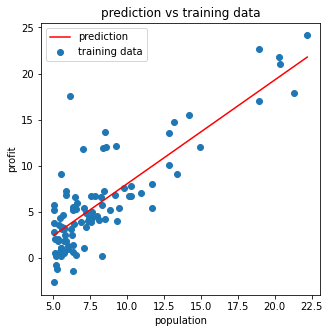

In [15]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x,f,"r",label="prediction") #Best fit line
ax.scatter(data.population,data.profit,label="training data")
leg=ax.legend(loc=2)
ax.set_xlabel("population")
ax.set_ylabel("profit")
plt.title("prediction vs training data")

Text(0.5, 1.0, 'error')

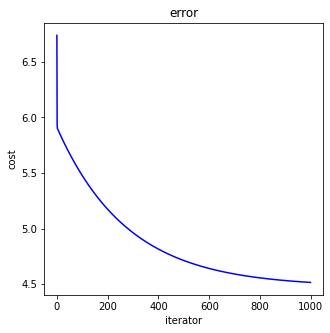

In [16]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters),cost,"b")
ax.set_xlabel("iterator")
ax.set_ylabel("cost")
ax.set_title('error')